In [1]:
import pandas as pd
from prophet import Prophet
import plotly.express as px
import requests
import json

In [3]:
df = pd.read_excel(r"C:\Users\LEONARDO ACUÑA\Documents\6 semestre\MyS\Proyecto-Monitoreo\Backend\src\data\PIB2.xlsx", thousands= '.')
df.head()

,Año,Datos
0,2005,337958
1,2006,381604
2,2007,428506
3,2008,476554
4,2009,501574


In [4]:
df.shape

(18, 2)

In [5]:
df.isnull().sum() 

Año      0
Datos    0
dtype: int64

In [6]:
df['ds'] = pd.to_datetime(df['Año'], format='%Y')

In [7]:
px.line(df, x ='ds', y = 'Datos', title= "Producto Interno Bruto")

In [9]:
print(df['ds'])

df['y'] = pd.to_numeric(df['Datos'])

0    2005-01-01
1    2006-01-01
2    2007-01-01
3    2008-01-01
4    2009-01-01
5    2010-01-01
6    2011-01-01
7    2012-01-01
8    2013-01-01
9    2014-01-01
10   2015-01-01
11   2016-01-01
12   2017-01-01
13   2018-01-01
14   2019-01-01
15   2020-01-01
16   2021-01-01
17   2022-01-01
Name: ds, dtype: datetime64[ns]


In [10]:
print(df)


     Año    Datos         ds        y
0   2005   337958 2005-01-01   337958
1   2006   381604 2006-01-01   381604
2   2007   428506 2007-01-01   428506
3   2008   476554 2008-01-01   476554
4   2009   501574 2009-01-01   501574
5   2010   544060 2010-01-01   544060
6   2011   619023 2011-01-01   619023
7   2012   666507 2012-01-01   666507
8   2013   714093 2013-01-01   714093
9   2014   762903 2014-01-01   762903
10  2015   804692 2015-01-01   804692
11  2016   863782 2016-01-01   863782
12  2017   920471 2017-01-01   920471
13  2018   987791 2018-01-01   987791
14  2019  1060068 2019-01-01  1060068
15  2020   997742 2020-01-01   997742
16  2021  1192586 2021-01-01  1192586
17  2022  1462522 2022-01-01  1462522


In [11]:
m = Prophet()
m.fit(df)

20:19:02 - cmdstanpy - INFO - Chain [1] start processing
20:19:02 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=3, freq='A')
future.tail()

,ds
16,2021-01-01
17,2022-01-01
18,2022-12-31
19,2023-12-31
20,2024-12-31


In [13]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower', 'yhat_upper' ]]

,ds,yhat,yhat_lower,yhat_upper
0,2005-01-01,3.018933e+05,2.201111e+05,3.794475e+05
1,2006-01-01,3.603820e+05,2.718576e+05,4.444988e+05
2,2007-01-01,4.006638e+05,3.197515e+05,4.770922e+05
3,2008-01-01,4.227597e+05,3.468237e+05,5.032870e+05
4,2009-01-01,5.242180e+05,4.426887e+05,6.090454e+05
5,2010-01-01,5.827067e+05,5.018448e+05,6.581410e+05
6,2011-01-01,6.229932e+05,5.395033e+05,7.019860e+05
7,2012-01-01,6.450939e+05,5.670454e+05,7.227947e+05
8,2013-01-01,7.465572e+05,6.682175e+05,8.253468e+05
9,2014-01-01,8.050899e+05,7.261387e+05,8.862092e+05


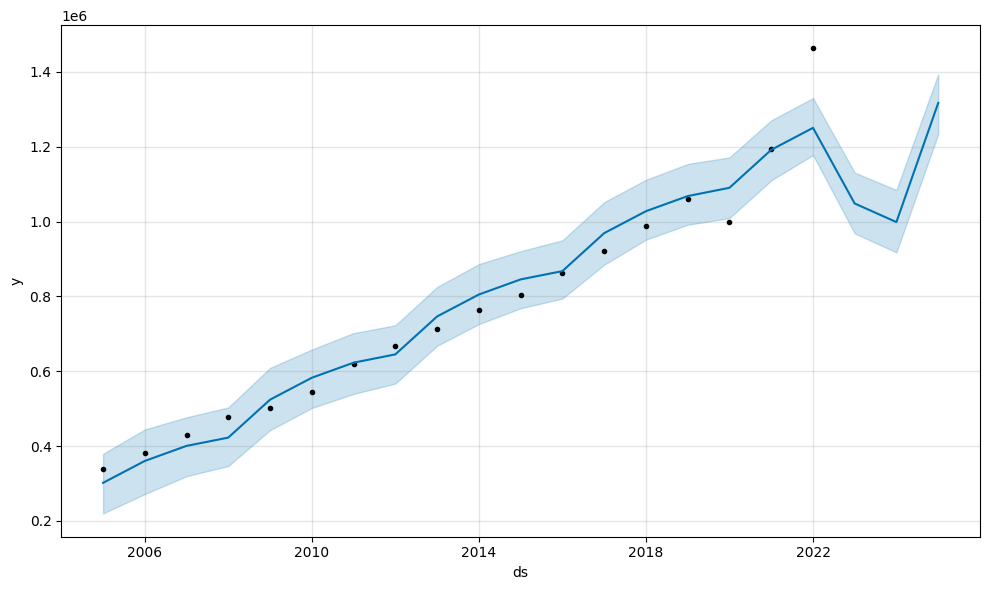

In [14]:
fig1=m.plot(forecast)

In [15]:
from urllib import request


url= "http://localhost:4000/prediccion"
args = forecast[['ds','yhat','yhat_lower', 'yhat_upper']]
data = {"datos": args.astype({'ds': 'str'}).to_dict(orient='records')}
print("enviar", data )

reponse = requests.post(url=url,json=data)
print("status res:",reponse.status_code)
print("respuesta servidor:", reponse.text)

enviar {'datos': [{'ds': '2005-01-01', 'yhat': 301893.3345473452, 'yhat_lower': 220111.12040222718, 'yhat_upper': 379447.50369026675}, {'ds': '2006-01-01', 'yhat': 360381.9994962027, 'yhat_lower': 271857.6429968745, 'yhat_upper': 444498.79607506824}, {'ds': '2007-01-01', 'yhat': 400663.7654571007, 'yhat_lower': 319751.52865895367, 'yhat_upper': 477092.20098719717}, {'ds': '2008-01-01', 'yhat': 422759.68615867174, 'yhat_lower': 346823.67394747585, 'yhat_upper': 503287.0069208927}, {'ds': '2009-01-01', 'yhat': 524218.01803292776, 'yhat_lower': 442688.7017898312, 'yhat_upper': 609045.3517254321}, {'ds': '2010-01-01', 'yhat': 582706.6830002198, 'yhat_lower': 501844.8359477694, 'yhat_upper': 658140.9667467156}, {'ds': '2011-01-01', 'yhat': 622993.1944393499, 'yhat_lower': 539503.3456574932, 'yhat_upper': 701986.047683237}, {'ds': '2012-01-01', 'yhat': 645093.8606546915, 'yhat_lower': 567045.3593043191, 'yhat_upper': 722794.6764008949}, {'ds': '2013-01-01', 'yhat': 746557.1912636295, 'yhat_l